1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
   on the test set. Hint: the KNeighborsClassifier works quite well for this task;
   you just need to find good hyperparameter values (try a grid search on the
   weights and n_neighbors hyperparameters).


In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score

from sklearn.model_selection import GridSearchCV

In [14]:
import matplotlib.pyplot as plt

In [2]:
data = fetch_openml('mnist_784', as_frame=False)

c:\Users\sayed\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = data.data, data.target

In [4]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000].astype(
    int), y[60000:].astype(int)

In [6]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
y_train_preds = model.predict(x_train)
y_test_preds = model.predict(x_test)

In [8]:
y_train_preds[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1])

In [9]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1])

In [10]:
print('Accuracy on Training data :', (accuracy_score(
    y_train,  y_train_preds)*100).round(2), '%')

print('Accuracy on Test data :', (accuracy_score(
    y_test,  y_test_preds)*100).round(3), '%')

Accuracy on Training data : 98.19 %
Accuracy on Test data : 96.88 %


In [11]:
grid = {
    'algorithm': ['auto'],
    'leaf_size': [30, 20, 1],
    'metric': ['minkowski'],
    'n_neighbors': [5, 7, 10],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}
search = GridSearchCV(KNeighborsClassifier(), param_grid=grid, cv=5, n_jobs=-1)

In [12]:
search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [30, 20, 1],
                         'metric': ['minkowski'], 'n_neighbors': [5, 7, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [14]:
search.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

In [17]:
train_fine_tuned_preds = search.predict(x_train)
test_fine_tuned_predictions = search.predict(x_test)

In [18]:
print('Accuracy on Training data :', (accuracy_score(
    y_train,  train_fine_tuned_preds)*100).round(2), '%')

print('Accuracy on Test data :', (accuracy_score(
    y_test,  test_fine_tuned_predictions)*100).round(3), '%')

Accuracy on Training data : 100.0 %
Accuracy on Test data : 96.91 %


In [11]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1, weights='distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [12]:
train_preds3 = knn.predict(x_train)
test_preds3 = knn.predict(x_test)

In [13]:
print('Accuracy on Training data :', (accuracy_score(
    y_train,  train_preds3)*100).round(2), '%')

print('Accuracy on Test data :', (accuracy_score(
    y_test,  test_preds3)*100).round(3), '%')

Accuracy on Training data : 100.0 %
Accuracy on Test data : 97.17 %


# 2- Data Augmentation


2. Write a function that can shift an MNIST image in any direction (left, right, up,
   or down) by one pixel.
   Then, for each image in the training set, create four
   shifted copies (one per direction) and add them to the training set. Finally, train
   your best model on this expanded training set and measure its accuracy on the
   test set. You should observe that your model performs even better now! This
   technique of artificially growing the training set is called data augmentation or
   training set expansion

Hint: You can use the shift() function from the scipy.ndimage.interpolation module. For example,
shift(image, [2, 1], cval=0) shifts the image two pixels down and one pixel to the right.


In [16]:
from scipy.ndimage.interpolation import shift

C:\Users\sayed\AppData\Local\Temp\ipykernel_20116\987197595.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [20]:
def show_image(image):
    new = image.reshape((28, 28))
    plt.imshow(new, cmap='binary')
    plt.axis('off')
    plt.show()

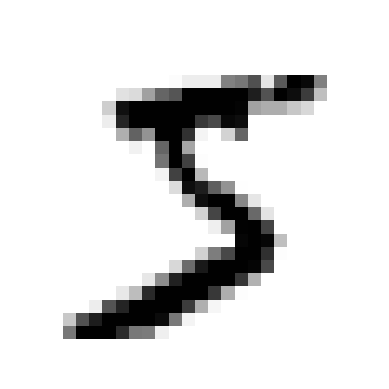

In [21]:
show_image(x_train[0])

In [25]:
newimage = shift(x_train[0].reshape((28, 28)), [4, 4], cval=0)

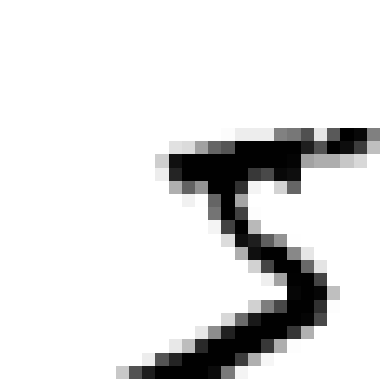

In [26]:
show_image(newimage)

In [27]:
import numpy as np

In [28]:
def images_shift(images, direction='up'):
    if direction == 'left':
        shifting = [0, -1]
    elif direction == 'right':
        shifting = [0, 1]
    elif direction == 'down':
        shifting = [1, 0]
    else:
        shifting = [-1, 0]

    newimages = np.zeros_like(images)

    for idx, image in enumerate(images):

        newimage = image.reshape((28, -1))
        newimage = shift(newimage, shifting, cval=0)
        newimage = newimage.flatten()

        newimages[idx] = newimage

    return newimages

In [35]:
totry = images_shift(x_train[0:2])
print(totry.shape)

(2, 784)


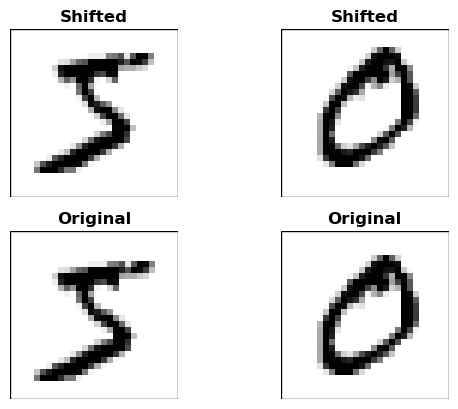

In [58]:
for idx, i in enumerate(totry):
    plt.subplot(2, len(totry), idx+1)
    plt.imshow(i.reshape((28, -1)), cmap='binary')
    plt.gca().add_patch(plt.Rectangle((-0.5, -0.5), 28,
                                      28, color='black', linewidth=1, fill=False))
    plt.title('Shifted')
    plt.axis('off')

for idx, i in enumerate(x_train[:len(totry)]):
    plt.subplot(2, len(totry), len(totry)+idx+1)
    plt.imshow(i.reshape((28, -1)), cmap='binary')
    plt.gca().add_patch(plt.Rectangle((-0.5, -0.5), 28,
                                      28, color='black', linewidth=1, fill=False))
    plt.title('Original')
    plt.axis('off')

plt.show()

let's create 4 shifted copies from each image of x_train and add them to the trining data.


In [69]:
augmented_images = np.zeros(shape=(len(x_train)*5, 784))
aug_labels = np.zeros(shape=(len(y_train)*5))

In [70]:
augmented_images[:len(x_train)] = images_shift(x_train, 'up')
aug_labels[:len(x_train)] = y_train

augmented_images[len(x_train):2*len(x_train)] = images_shift(x_train, 'down')
aug_labels[len(x_train):2*len(x_train)] = y_train

augmented_images[2*len(x_train):3*len(x_train)] = images_shift(x_train, 'left')
aug_labels[2*len(x_train):3*len(x_train)] = y_train

augmented_images[3*len(x_train):4*len(x_train)
                 ] = images_shift(x_train, 'right')
aug_labels[3*len(x_train):4*len(x_train)] = y_train

augmented_images[4*len(x_train):5*len(x_train)] = x_train
aug_labels[4*len(x_train):5*len(x_train)] = y_train

In [71]:
knn.fit(augmented_images, aug_labels)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [72]:
train_preds4 = knn.predict(augmented_images)
test_preds4 = knn.predict(x_test)

In [74]:
print('Accuracy on Training data :', (accuracy_score(
    aug_labels,  train_preds4)*100).round(2), '%')

print('Accuracy on Test data :', (accuracy_score(
    y_test,  test_preds4)*100).round(3), '%')

Accuracy on Training data : 100.0 %
Accuracy on Test data : 97.63 %
